<a href="https://colab.research.google.com/github/DENGCPU/TensorFlow-Study/blob/main/%E7%94%A8tf_data%E5%8A%A0%E8%BD%BDCSV%E6%95%B0%E6%8D%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
# make numpy values easier to read
# 四舍五入到小数点后3位，supress为true——抑制小数点的科学计数法表示
np.set_printoptions(precision=3,suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [23]:
# 加载视数据到内存中 Abalone Dataset数据集
# 将数据下载到pandas ,DataFrame的方式
abalone_train = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
                            names=['Length','Diameter','Height','Whole weight','Shuched weight','Viscera wieight',
                                   'Shell weight','Age'])
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shuched weight,Viscera wieight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [24]:
# 将特征和标签值分开以进行训练
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

# 将特征打包成单个Numpy数组
abalone_features =np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [25]:
# 制作一个回归模型，预测年龄
abalone_model = tf.keras.Sequential([
    layers.Dense(74),
    layers.Dense(1)
])
abalone_model.compile(loss= tf.keras.losses.MeanSquaredError(),
                      optimizer=tf.keras.optimizers.Adam())

# 训练模型
abalone_model.fit(abalone_features,abalone_labels,epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 3ms/step - loss: 57.7292
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 10.6261
Epoch 3/10
104/104 [==============================] - 0s 3ms/step - loss: 8.4306
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 7.8997
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 7.4343
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 7.0662
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 6.7990
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 6.6138
Epoch 9/10
104/104 [==============================] - 0s 3ms/step - loss: 6.4698
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 6.3719


In [26]:
# 对模型输入归一化处理
# 计算每列的均值和方差，并对这些内容进行归一化处理
normalize = layers.Normalization()

# 使归一化层适应训练数据
normalize.adapt(abalone_features)

In [27]:
# 将归一化层用于模型
norm_abalone_model = tf.keras.Sequential(
   [
        normalize,
    layers.Dense(64),
    layers.Dense(1)
   ]
)
norm_abalone_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                           optimizer= tf.keras.optimizers.Adam())
norm_abalone_model.fit(abalone_features,abalone_labels,epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 92.1192
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 51.9664
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 15.5066
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 5.6868
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0113
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9900
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9594
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9454
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9192
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9022


In [28]:
# titanic数据集
titanic= pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [29]:
titanic_features  = titanic.copy()
titanic_labels = titanic_features.pop('survived')

# 数据类型和范围均不同，所以需要对每列进行单独处理
# 一个例子：
input = tf.keras.Input(shape=(),dtype=tf.float32)
result= input * 2 +1
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add_1')>

In [30]:
calc  = tf.keras.Model(inputs=input,outputs=result)
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


In [31]:
# 构建预处理模型，需要先构建一组符号tf.keras.Input对象
# 匹配CSV列的名称和数据类型

inputs={}
for name, column in titanic_features.items():
  dtype=column.dtype
  if dtype==object:
    dtype=tf.string
  else:
    dtype=tf.float32
  inputs[name]=tf.keras.Input(shape=(1,),name=name,dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [32]:
# 将数值输入串联在一起，并通过归一化层运行他们：
numeric_inputs= {name: input for name, input in inputs.items()
                if input.dtype==tf.float32}
x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs=norm(x)
all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_4')>

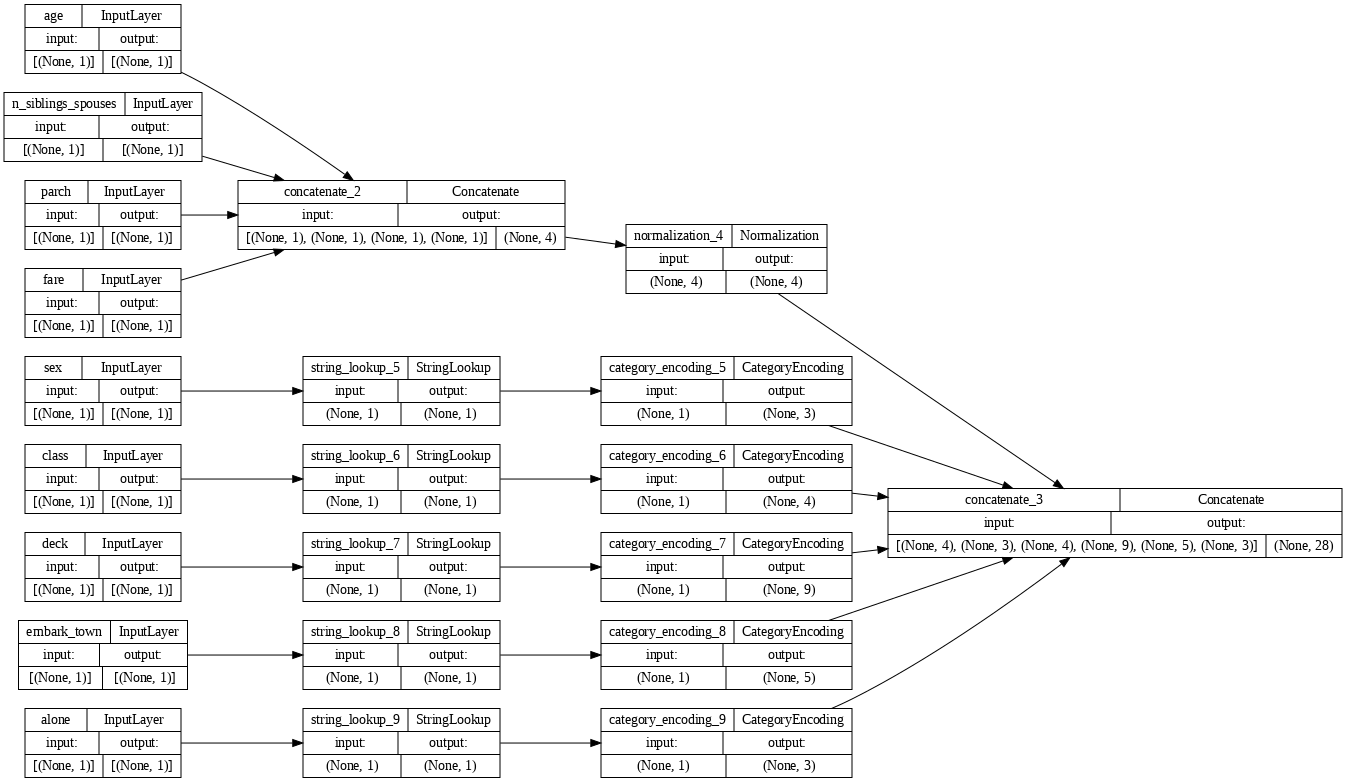

In [33]:
# 将所有符号预处理结果串联起来
preprocessed_inputs = [all_numeric_inputs]

# 对于字符串输入，使用对于函数将字符串映射到词汇表中的整数索引
# 然后将索引转为适合模型的float32数据
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x=one_hot(x)
  preprocessed_inputs.append(x)

preprocessed_inputs_cat  = layers.Concatenate()(preprocessed_inputs)
titanic_preprocessing  = tf.keras.Model(inputs,preprocessed_inputs_cat)
# LR从左向右排列，dpi是图像的点密度Dots per inch
tf.keras.utils.plot_model(model=titanic_preprocessing,rankdir='LR',dpi=72,show_shapes=True)

In [34]:
# 转换为张量字典
titanic_features_dict = {name: np.array(value)
                      for name,value in titanic_features.items()}

# 切出第一个训练样本，传递给预处理模型
features_dict  = {name:values[:1] for name,values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [38]:
# 在此基础上，构建模型
def titanic_model(preprocessing_head,inputs):
  body=tf.keras.Sequential(
   [layers.Dense(64),
      layers.Dense(1)]
  )
  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model= tf.keras.Model(inputs,result)
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model=titanic_model(titanic_preprocessing,inputs)

# 训练模型时，将特征字典作为x传递，将标签作为y传递
titanic_model.fit(x=titanic_features_dict,y=titanic_labels,epochs=10)


Epoch 1/10
20/20 [==============================] - 2s 2ms/step - loss: 0.6838
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5481
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4976
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4685
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4499
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4400
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4321
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4287
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4253
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4233


In [39]:
# 保存模型
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

In [40]:
features_dict={name: values[:1] for name , values in
               titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before - after) < 1e-3
print(before)
print(after)

tf.Tensor([[-1.839]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.839]], shape=(1, 1), dtype=float32)


In [43]:
import itertools

def slices(features):
  for i in itertools.count():
    # for each feature take index 'i'
    example = {name: values[i] for name, values in features.items()}
    yield example

for example in slices(titanic_features_dict):
  for name, value in example.items():
    # name为19个字符的字符串形式
    print(f"{name:19s}:{value}")
  break


sex                :male
age                :22.0
n_siblings_spouses :1
parch              :0
fare               :7.25
class              :Third
deck               :unknown
embark_town        :Southampton
alone              :n
